<a href="https://colab.research.google.com/github/manasgoel2002/Metal-Fitness-Tracker/blob/main/metal_fitness_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## **load data**

In [ ]:
d1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/mental-and-substance-use-as-share-of-disease.csv")
d2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/prevalence-by-mental-and-substance-use-disorder.csv")

In [ ]:
data=pd.merge(d1, d2)
data.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,AFG,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,AFG,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,AFG,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,AFG,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,AFG,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


# **data cleaning**

In [ ]:
data.isnull().sum()
data.drop('Code',axis=1,inplace=True)
data.head(10)



,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


In [ ]:
data.size,data.shape

(68400, (6840, 10))

In [ ]:
data.set_axis(['Country', 'Year', 'Mental_fitness', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 'Anxiety', 'Drug_use', 'Depressive', 'Alcohol'], axis=1, inplace=True)

In [ ]:
data.head(10)

,Country,Year,Mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_use,Depressive,Alcohol
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


# **illustrations**

[]

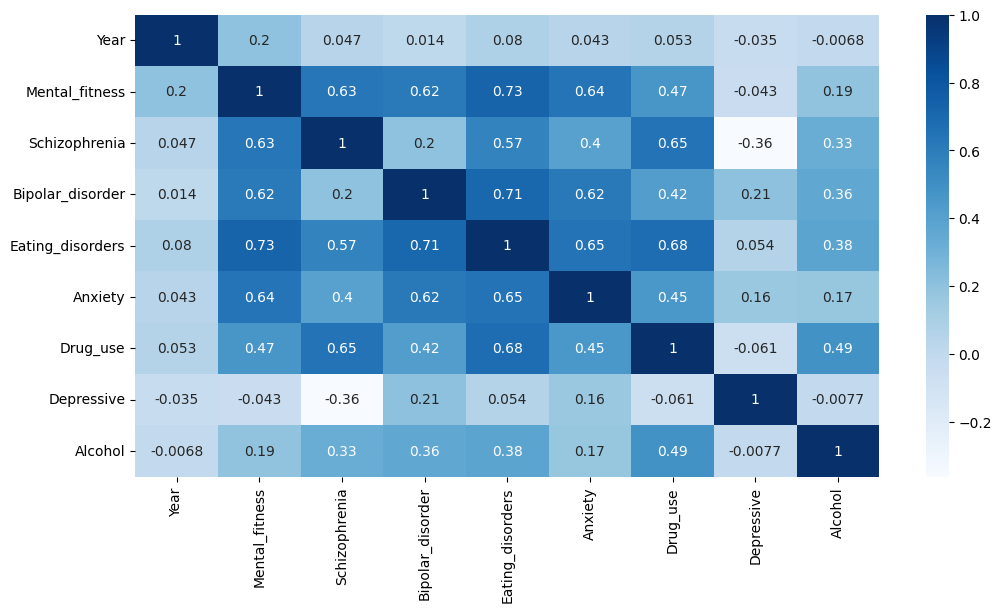

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

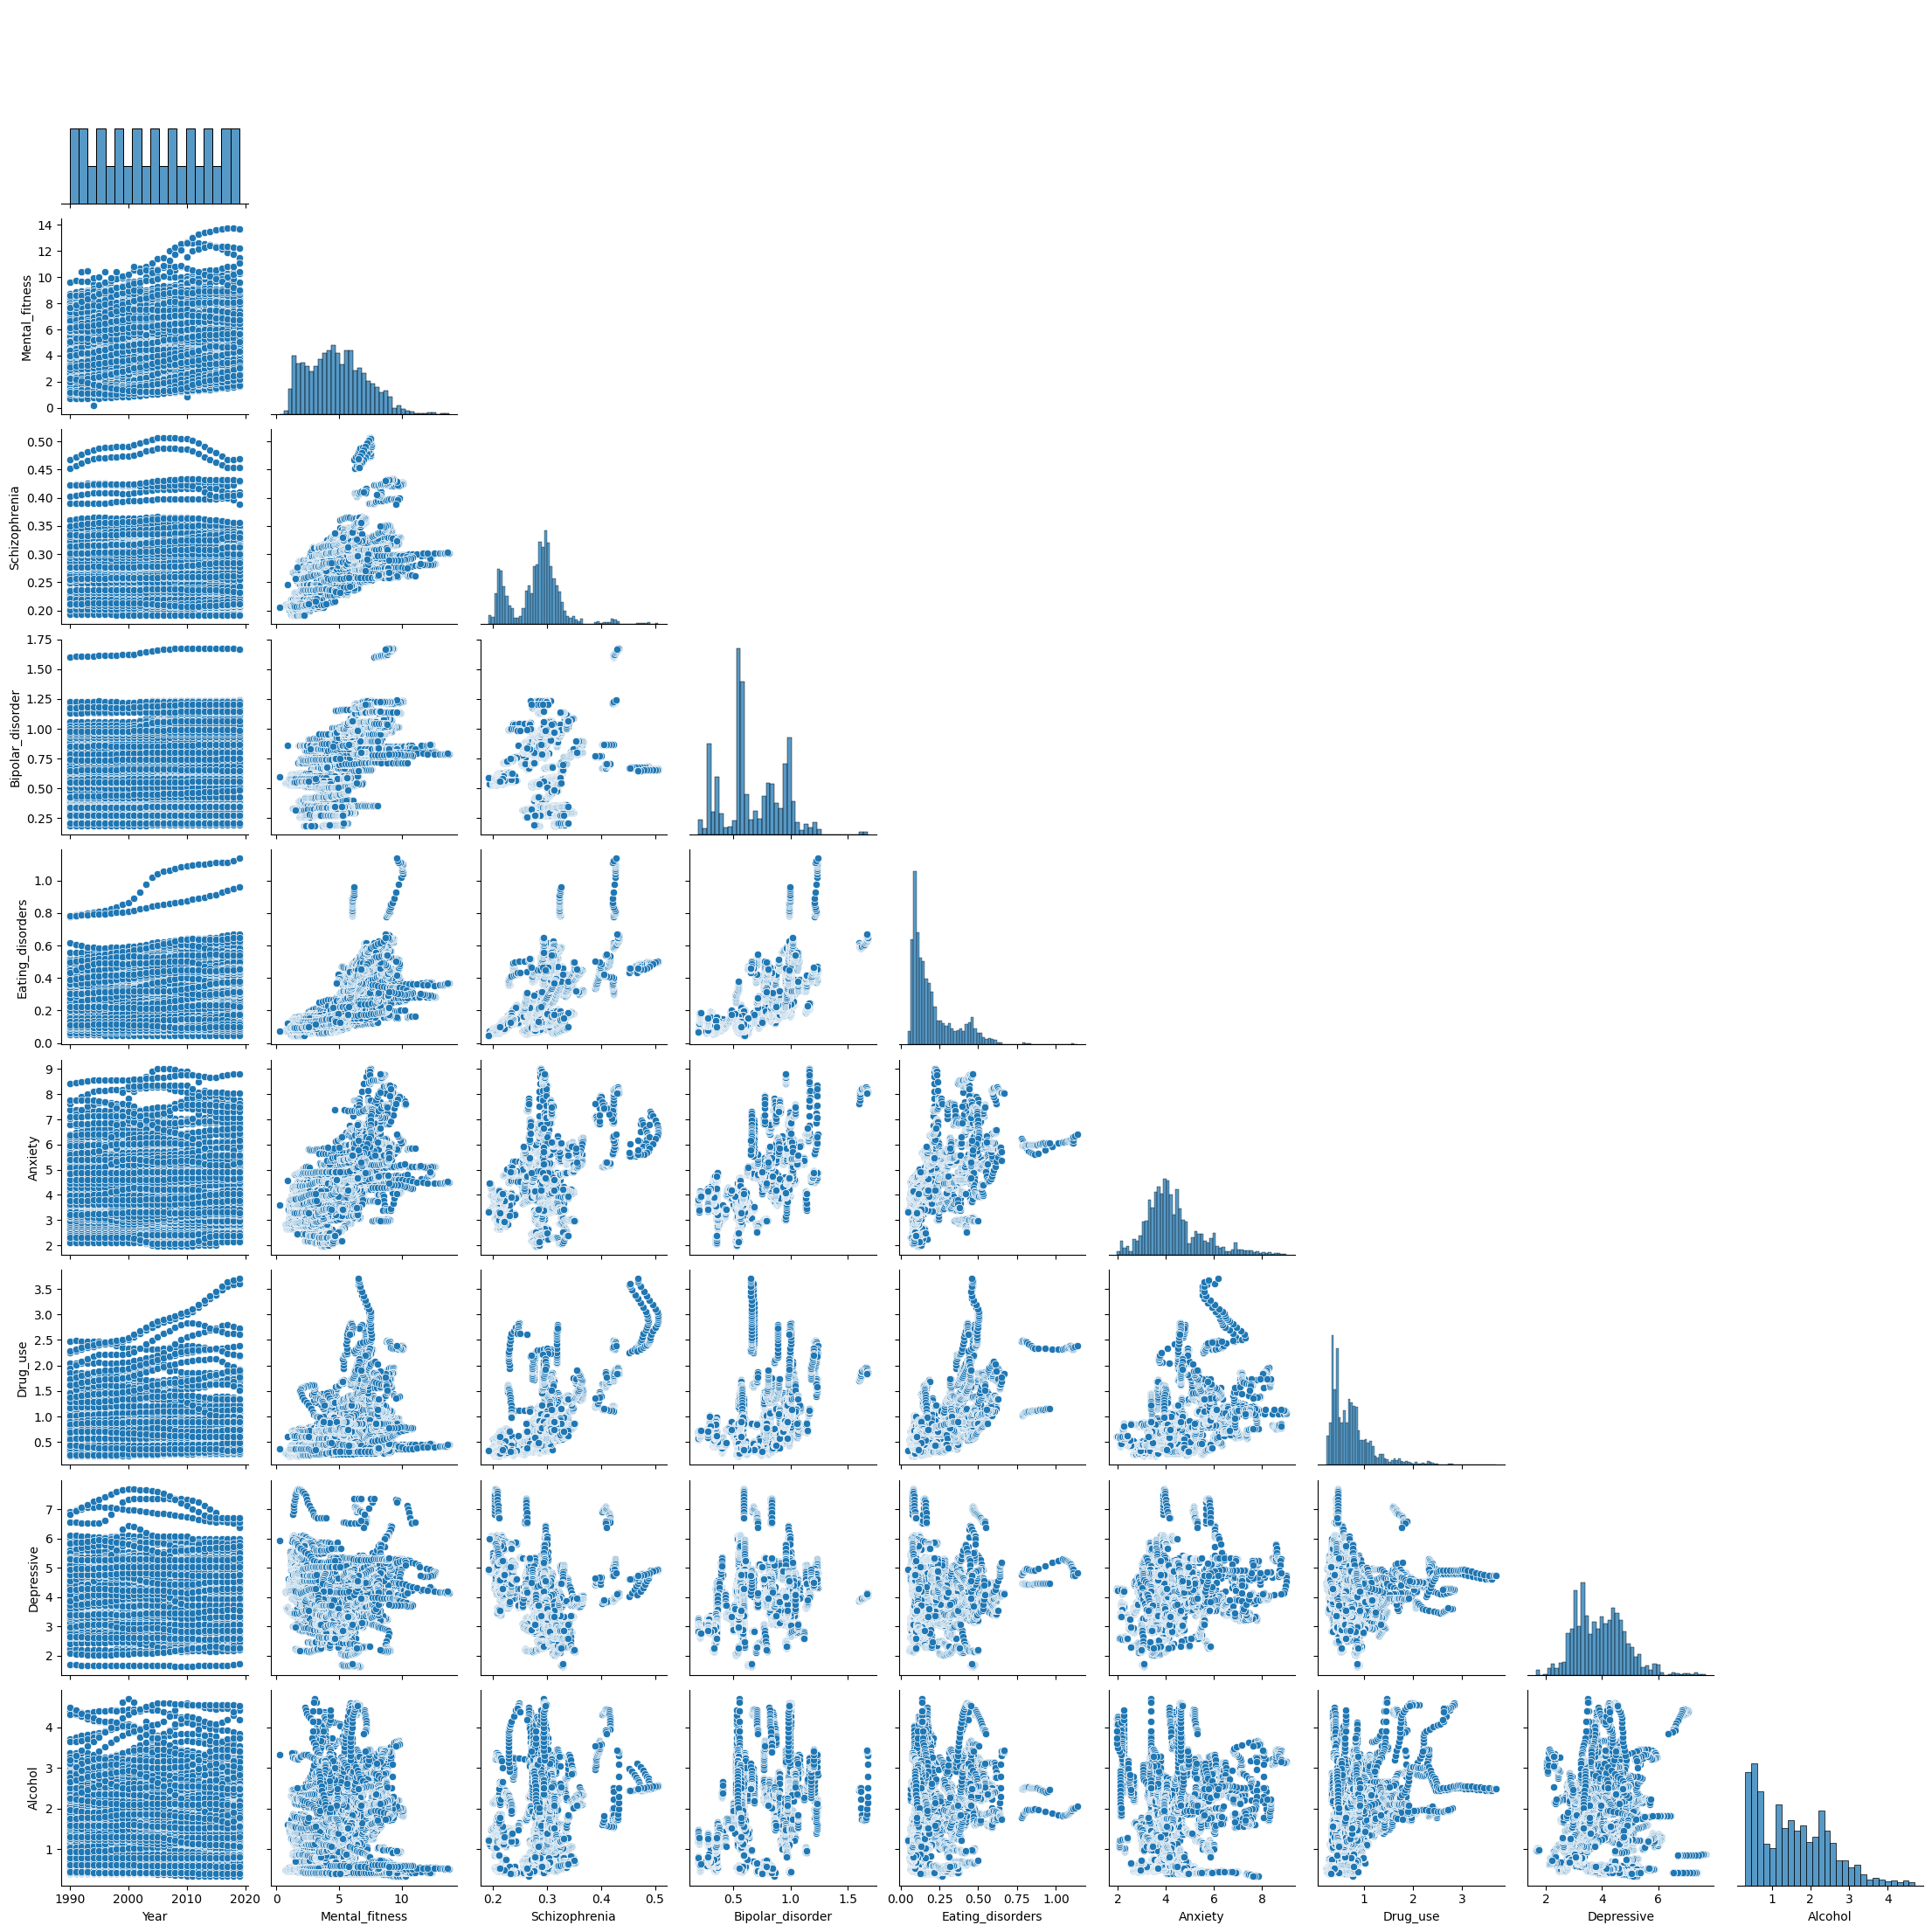

In [ ]:
sns.pairplot(data,corner=True)
plt.show()

In [ ]:
mean=data['Mental_fitness'].mean()


In [ ]:
fig=px.pie(data, values='Mental_fitness',names='Year')
fig.show()

In [ ]:
fig=px.line(data,x="Year",y="Mental_fitness",color='Country',markers=True)
fig.show()

In [ ]:
data.shape

(6840, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
    data[i]=l.fit_transform(data[i])


In [ ]:
data.shape

(6840, 10)

# **split data**

In [ ]:
X=data.drop('Mental_fitness',axis=1)
y=data['Mental_fitness']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.20,random_state=2)


In [ ]:
print("xtrain: ",xtrain.shape)
print("xtest: ",xtest.shape)
print("ytrain: ",ytrain.shape)
print("ytest: ",ytest.shape)


xtrain:  (5472, 9)
xtest:  (1368, 9)
ytrain:  (5472,)
ytest:  (1368,)


# **model training**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mean_squared_error(ytrain, ytrain_pred))
r2 = r2_score(ytrain, ytrain_pred)
print("The Linear Regression model performance for training set")
print("---------------------------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The Linear Regression model performance for training set
---------------------------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)
print("The Random Forest Regressor model performance for training set")
print("---------------------------------------------------------")
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))


The Random Forest Regressor model performance for training set
---------------------------------------------------------
MSE: 0.005072173819571489
RMSE: 0.07121919558357485
R2 score: 0.9990560539220085


# **evaluation**

In [ ]:
ytest_pred_lr = lr.predict(xtest)
mse_lr = mean_squared_error(ytest, ytest_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(ytest, ytest_pred_lr))
r2_lr = r2_score(ytest, ytest_pred_lr)

print("The Linear Regression model performance for testing set")
print("-------------------------------------------------------")
print('MSE is {}'.format(mse_lr))
print('RMSE is {}'.format(rmse_lr))
print('R2 score is {}'.format(r2_lr))

# Random Forest Regressor model evaluation for testing set
ytest_pred_rf = rf.predict(xtest)
mse_rf = mean_squared_error(ytest, ytest_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(ytest, ytest_pred_rf))
r2_rf = r2_score(ytest, ytest_pred_rf)
print("The Random Forest Regressor model performance for testing set")
print("------------------------------------------------------------")
print('MSE is {}'.format(mse_rf))
print('RMSE is {}'.format(rmse_rf))
print('R2 score is {}'.format(r2_rf))

The Linear Regression model performance for testing set
-------------------------------------------------------
MSE is 1.1357545319272384
RMSE is 1.0657178481789813
R2 score is 0.7638974087055272
The Random Forest Regressor model performance for testing set
------------------------------------------------------------
MSE is 0.030241746945023705
RMSE is 0.17390154382587783
R2 score is 0.9937132940100395
